In [23]:
import re
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [24]:
sns.set(style="whitegrid")
DIR_PATH = "dataset/rollingsales/"
df = []
CLEAN_COLUMNS = ["apart_ment_number", "zip_code", "block", "lot", "ease_ment", "address", "residential_units",
                 "commercial_units", "quantile"]

In [25]:
def find_path(value: str):
    return re.search("(?<=_)(.*?)(?=\.)", value).group(0)

In [26]:
def build_type_category(category: str):
    type_buffer = ""
    building_types = ["family", "condos", "unit", "store", "tax", "apartments", "buildings", "residential", "factories",
                      "garages", "warehouses", "land", "facilities"]
    for type in building_types:
        if type.upper() in category:
            type_buffer = type
            break
    return type_buffer.capitalize() if type_buffer != "" else "Other"

In [27]:
for path in os.listdir(DIR_PATH):
    borough_name = find_path(path)
    data = pd.read_excel(str(DIR_PATH + path), skiprows=4)
    data.columns = [column.lower().replace("\n", " ").replace("-", " ").replace(" ", "_") for column in
                    data.columns]
    data.borough = borough_name
    filtered_data = data[(data.total_units > 0) & (data.land_square_feet > 0)]
    filtered_data.insert(0, 'quantile', pd.qcut(filtered_data.sale_price, 10, labels=False, duplicates='drop'))
    filtered_data = filtered_data[(filtered_data['quantile'] > 0) & (filtered_data['quantile'] < 10)]
    filtered_data.drop(CLEAN_COLUMNS, axis=1, inplace=True)
    df.append(filtered_data)

In [28]:
result_df = pd.concat(df)
result_df.insert(3, "type_building",
                 [build_type_category(category) for category in result_df.building_class_category.to_list()])
result_df.insert(len(result_df.columns) - 1, "quarter_group",
                 [str(value.quarter) + "-quarter" for value in result_df.sale_date.to_list()])
result_df.insert(len(result_df.columns) - 3, "price_per_feet", result_df.sale_price / result_df.land_square_feet)
result_df.insert(len(result_df.columns)-1, "date", result_df['sale_date'].apply(lambda x: x.strftime("%Y-%B")))
df = result_df[result_df['price_per_feet'] > 0]

In [29]:
df.describe()

,total_units,land_square_feet,gross_square_feet,year_built,price_per_feet,sale_price
count,23735.000000,2.373500e+04,2.373500e+04,23735.00000,2.373500e+04,2.373500e+04
mean,4.484938,5.022656e+03,1.066539e+04,1939.55138,4.593229e+02,1.740214e+06
std,56.615830,6.138393e+04,4.070108e+04,62.32173,7.952931e+03,1.365487e+07
min,1.000000,1.000000e+00,0.000000e+00,0.00000,9.267432e-03,2.100000e+01
25%,1.000000,2.000000e+03,1.584000e+03,1920.00000,1.185417e+02,3.550000e+05
50%,2.000000,2.517000e+03,2.240000e+03,1930.00000,1.887810e+02,5.100000e+05
75%,2.000000,4.000000e+03,3.480000e+03,1955.00000,3.129890e+02,7.961360e+05
max,8271.000000,6.777433e+06,2.548000e+06,2013.00000,1.200000e+06,1.100000e+09


In [30]:
df

,borough,neighborhood,building_class_category,type_building,tax_class_at_present,building_class_at_present,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,price_per_feet,sale_price,quarter_group,date,sale_date
0,bronx,BATHGATE,01 ONE FAMILY HOMES,Family,1,A5,1,1842,2048,1901,1,A5,192.725299,355000,3-quarter,2013-July,2013-07-08
1,bronx,BATHGATE,01 ONE FAMILY HOMES,Family,1,A1,1,1103,1290,1910,1,A1,430.479601,474819,2-quarter,2013-May,2013-05-20
2,bronx,BATHGATE,01 ONE FAMILY HOMES,Family,1,A1,1,1986,1344,1899,1,A1,105.740181,210000,1-quarter,2013-March,2013-03-12
3,bronx,BATHGATE,01 ONE FAMILY HOMES,Family,1,A1,1,2329,1431,1901,1,A1,147.323315,343116,3-quarter,2013-July,2013-07-01
5,bronx,BATHGATE,02 TWO FAMILY HOMES,Family,1,B1,2,2000,2400,1993,1,B1,158.250000,316500,4-quarter,2012-December,2012-12-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6348,statenisland,WOODROW,02 TWO FAMILY HOMES,Family,1,B2,2,5610,1670,1994,1,B2,99.821747,560000,2-quarter,2013-April,2013-04-18
6349,statenisland,WOODROW,02 TWO FAMILY HOMES,Family,1,B2,2,7525,2160,1994,1,B2,69.102990,520000,2-quarter,2013-June,2013-06-18
6351,statenisland,WOODROW,02 TWO FAMILY HOMES,Family,1,B9,2,2590,2450,1998,1,B9,194.980695,505000,2-quarter,2013-May,2013-05-15
6354,statenisland,WOODROW,22 STORE BUILDINGS,Store,4,K6,1,21663,6950,2008,4,K6,60.010156,1300000,2-quarter,2013-May,2013-05-29


Text(0.5, 0.98, 'Покупки розбиті по кварталам')

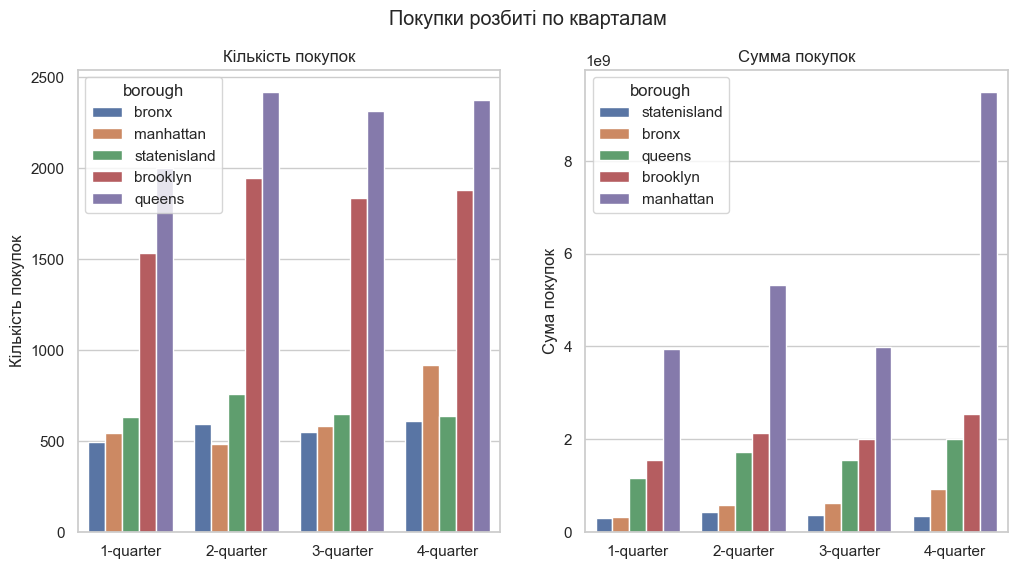

In [31]:
group_by_sale_quarter = df.groupby(["quarter_group", "borough"], as_index=False)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
groups_titles = ["Кількість покупок", "Сумма покупок", "Максимальні суми покупок "]
y_labels = ["Кількість покупок", "Сума покупок", "Максимальна сума"]
groups = [group_by_sale_quarter.count().sort_values(["quarter_group", "sale_price"]),
          group_by_sale_quarter.sum().sort_values(["quarter_group", "sale_price"])]
for index, group in enumerate(groups):
    sns.barplot(ax=axes[index],
                data=group,
                x=group.quarter_group,
                y=group.sale_price,
                hue=group.borough, )
    axes[index].set(xlabel="", title=groups_titles[index], ylabel=y_labels[index])
fig.suptitle("Покупки розбиті по кварталам")

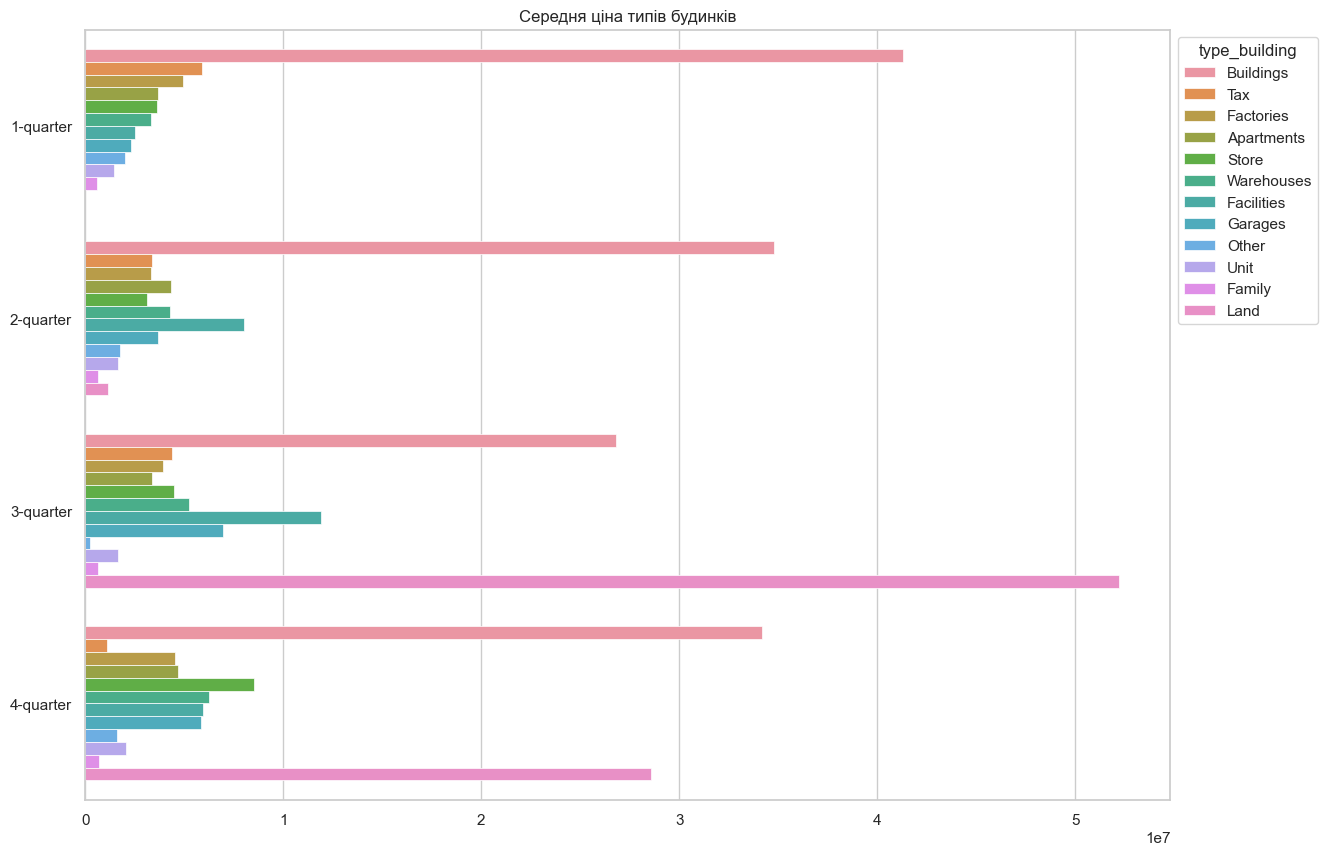

In [32]:
group_by_type_building = df.groupby(["quarter_group", "type_building"], as_index=False)
fig, ax = plt.subplots(figsize=(14, 10))
group_by_type_building_sum = group_by_type_building.mean().sort_values(["quarter_group", "sale_price"],ascending=[True,False])
sns.barplot(
    ax=ax,
    data=group_by_type_building_sum,
    y="quarter_group",
    x="sale_price",
    hue="type_building",
    linewidth=0.5,
    antialiased=True)
ax.set(title="Середня ціна типів будинків", xlabel=None, ylabel=None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

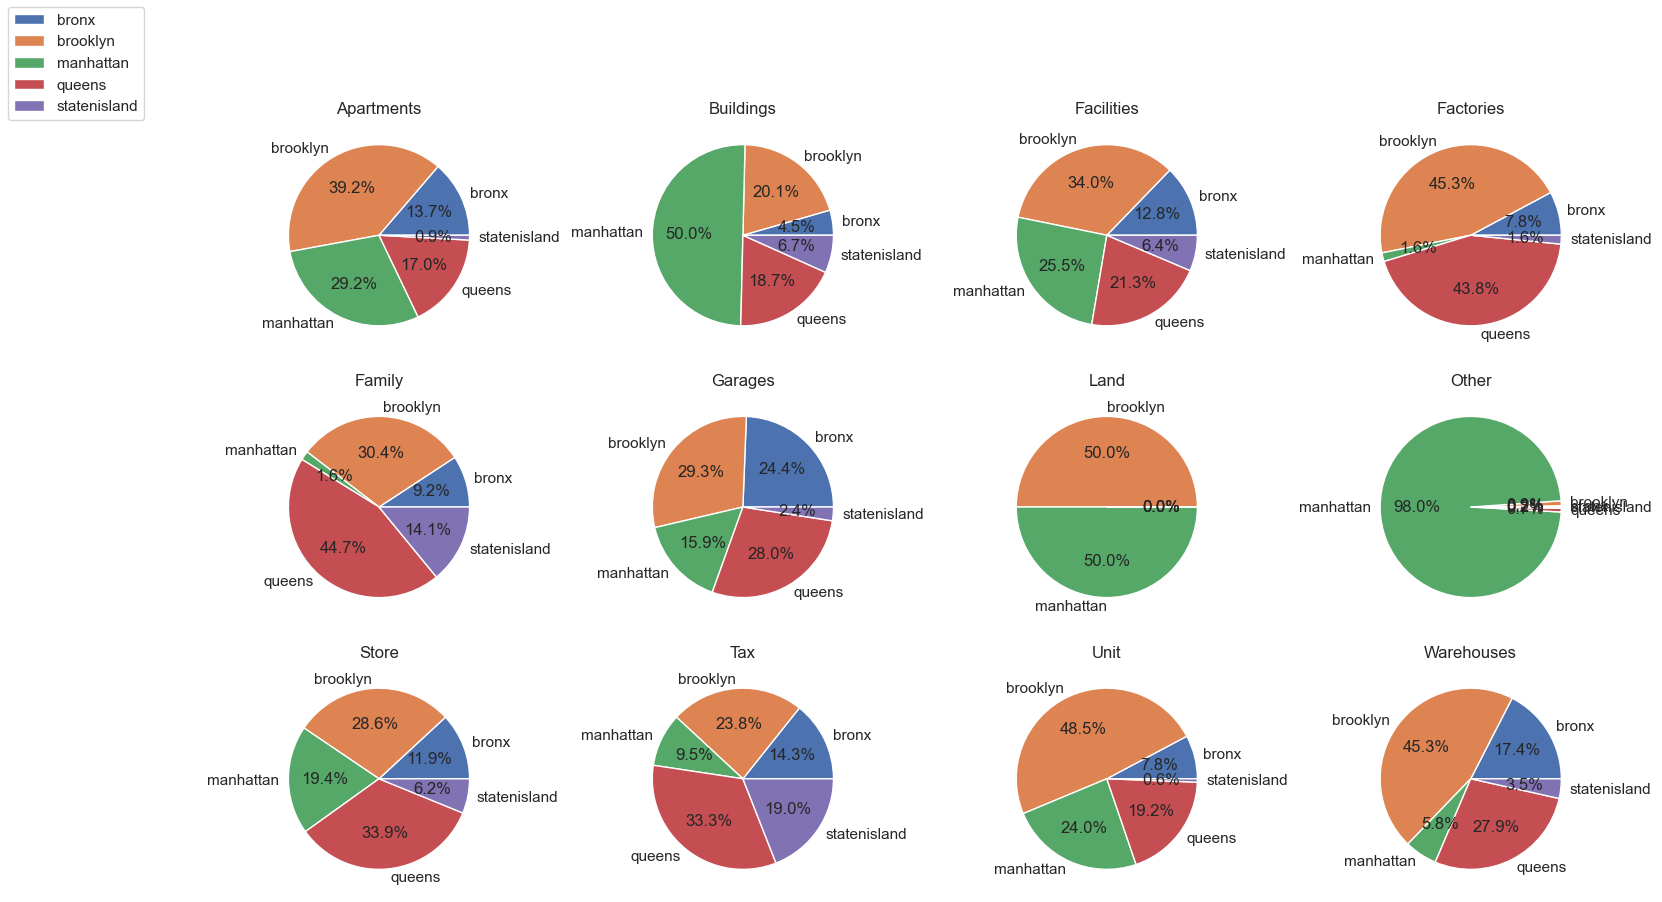

In [33]:
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
group_by_type_building_index = df.loc[:, ["borough", "type_building", "neighborhood"]].groupby(
    ["type_building", "borough"]).count().apply(lambda x: (100 * x / x.sum()).round(2))
group_by_type_building_index.unstack(level=0).plot.pie(autopct='%1.1f%%',
                                                       ax=axes,
                                                       subplots=True,
                                                       legend=False,
                                                       wedgeprops =
                                                       {
                                                        'linewidth': 1,
                                                        'antialiased': True,
                                                       })
titles = df.type_building.sort_values().unique()
for i, ax in enumerate(axes.flat):
    ax.get_yaxis().set_visible(False)
    ax.set(title=titles[i])

handles, labels = axes[2, 2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left')

C:\Users\garik\AppData\Local\Temp\ipykernel_20844\2657037743.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=date, rotation=90)


[Text(0, 0, '2012-August'),
 Text(1, 0, '2012-December'),
 Text(2, 0, '2012-November'),
 Text(3, 0, '2012-October'),
 Text(4, 0, '2012-September'),
 Text(5, 0, '2013-April'),
 Text(6, 0, '2013-August'),
 Text(7, 0, '2013-February'),
 Text(8, 0, '2013-January'),
 Text(9, 0, '2013-July'),
 Text(10, 0, '2013-June'),
 Text(11, 0, '2013-March'),
 Text(12, 0, '2013-May')]

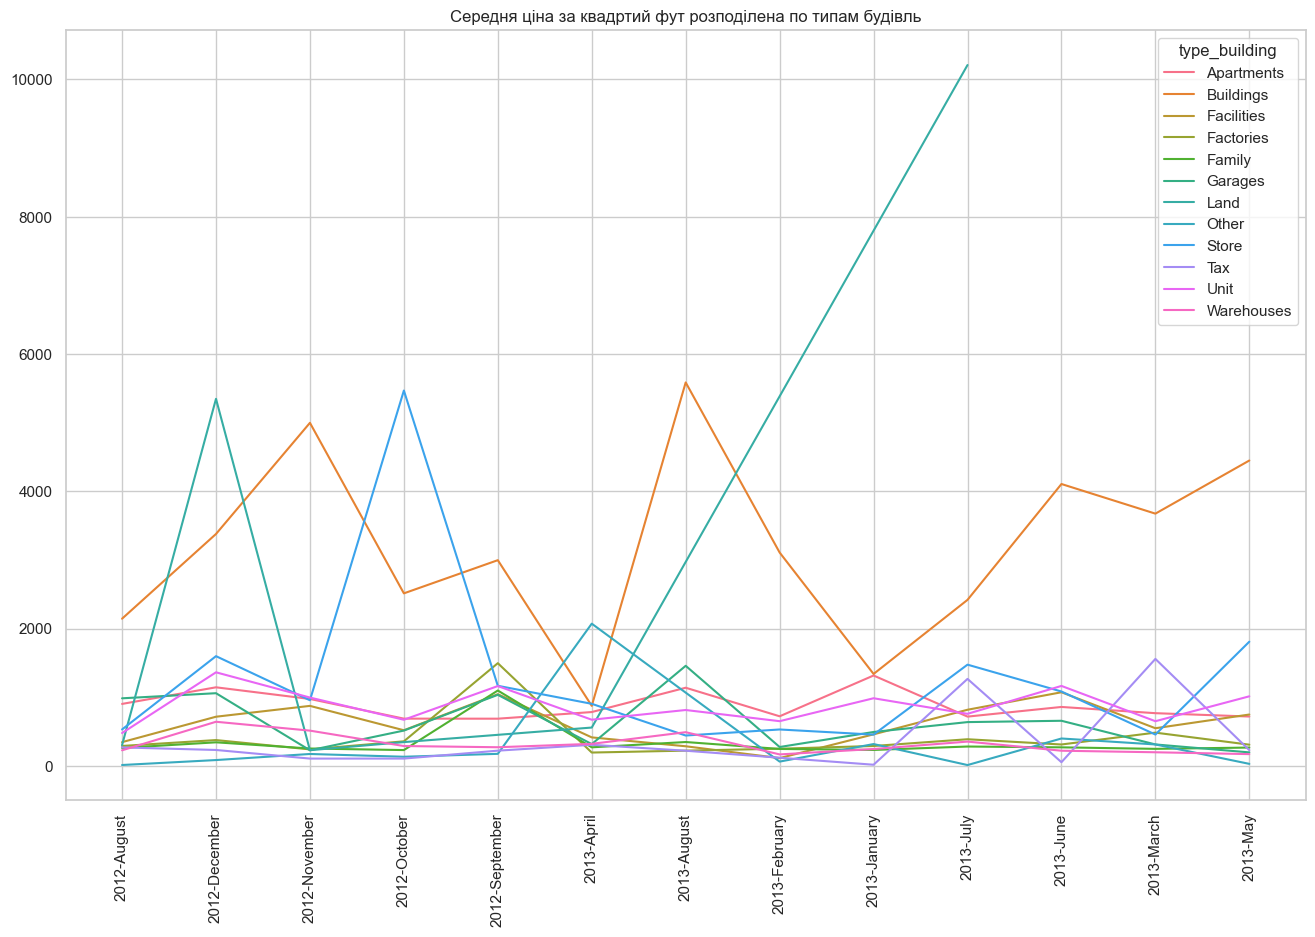

In [39]:
fig, ax = plt.subplots(figsize=(16, 10))
group_period_type = df.groupby(["date", "type_building"])["price_per_feet"].agg(["mean"])
date = df["date"].sort_values(ascending=True).unique()
sns.lineplot(data=group_period_type, x="date", y="mean", ax=ax, hue="type_building")
ax.set(ylabel=None, xlabel=None, title="Середня ціна за квадртий фут розподілена по типам будівль")
ax.set_xticklabels(labels=date, rotation=90)

C:\Users\garik\AppData\Local\Temp\ipykernel_20844\3074885075.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=date, rotation=90)


[Text(0, 0, '2012-August'),
 Text(1, 0, '2012-December'),
 Text(2, 0, '2012-November'),
 Text(3, 0, '2012-October'),
 Text(4, 0, '2012-September'),
 Text(5, 0, '2013-April'),
 Text(6, 0, '2013-August'),
 Text(7, 0, '2013-February'),
 Text(8, 0, '2013-January'),
 Text(9, 0, '2013-July'),
 Text(10, 0, '2013-June'),
 Text(11, 0, '2013-March'),
 Text(12, 0, '2013-May')]

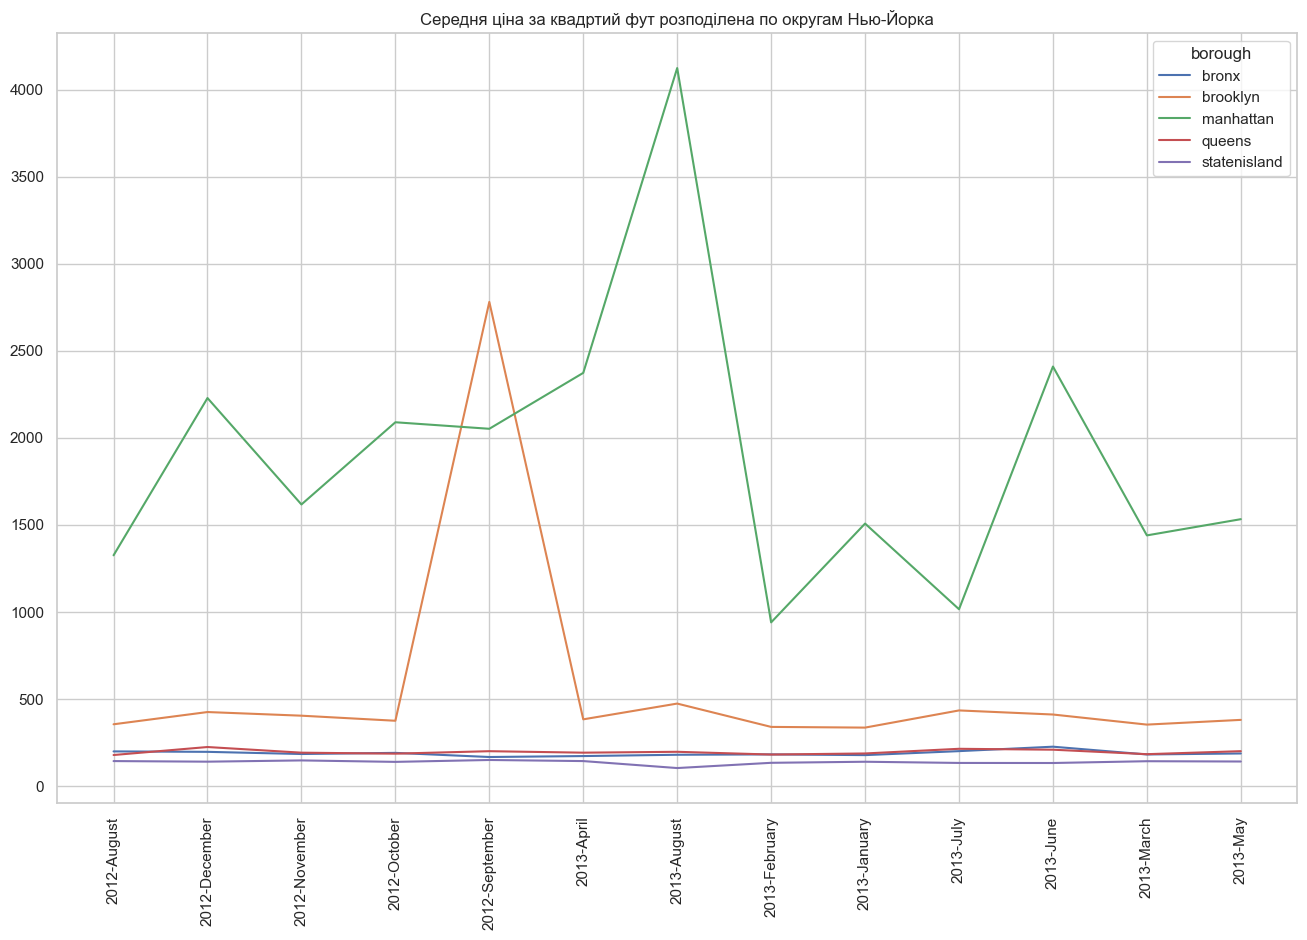

In [41]:
fig, ax = plt.subplots(figsize=(16, 10))
group_period_borough = df.groupby(["date", "borough"])["price_per_feet"].agg(["mean"])
sns.lineplot(data=group_period_borough, x="date", y="mean", ax=ax, hue="borough")
ax.set(xlabel=None, ylabel=None, title="Середня ціна за квадртий фут розподілена по округам Нью-Йорка")
ax.set_xticklabels(labels=date, rotation=90)